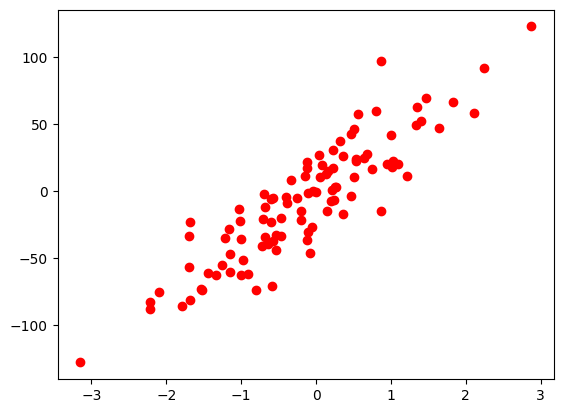

In [3]:
import numpy as np 
from sklearn import datasets
import matplotlib.pyplot as plt
X_numpy,Y_numpy = datasets.make_regression(
        n_samples=100,
        n_features=1,
        noise=20,
        random_state=12
)
plt.plot(X_numpy,Y_numpy,"ro")  # 红色圆点
plt.show()

In [4]:
import torch 
import numpy as np
# 将numpy 的数据类型转成tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))
print(X.shape,Y.shape)
# 对Y进行格式统一
# Y = Y.view(100,1)
X=X.view(100)
# 模型训练
print(X.shape,Y.shape)

torch.Size([100, 1]) torch.Size([100])
torch.Size([100]) torch.Size([100])


In [7]:
# w = torch.tensor(1,dtype=torch.float32,requires_grad=True) 
# b = torch.tensor(1,dtype=torch.float32,requires_grad=True) 
w = torch.randn(1,requires_grad=True)
b = torch.randn(1,requires_grad=True)
print(w,b)
lr = 0.00001

# 1.正向传播函数（模型计算图，此时数据和方法是分离的）
def forward(w, X):  # 构建计算图
    # global w, b
    return X*w + b

# 2.损失函数
def lossFunction(y_pred, y):  # 确定损失函数
    return ((y_pred - y)**2).mean()  # 成批计算，从X和Y的定义也可以看出


# 3. 模型训练过程
epochs = 200000  #3000000  # 100000  # 
for epoch in range(epochs):     # epochs为训练的次数
    # 1.正向传播
    pred = forward(w, X)
    # 2.计算损失
    loss = lossFunction(pred, Y)
    # 3.向后传播
    loss.backward()
    # 4.更新参数
    w.data = w.data - lr * w.grad
    b.data = b.data - lr * b.grad
    # 5.清空梯度
    w.grad.zero_()
    b.grad.zero_()

    if epoch % 10000 == 0:
        print(f"loss={loss.item()},w={w.item()}")

tensor([0.6827], requires_grad=True) tensor([-0.7434], requires_grad=True)
loss=2000.91064453125,w=0.6835823059082031
loss=1416.4256591796875,w=8.242023468017578
loss=1047.1951904296875,w=14.268348693847656
loss=813.3306274414062,w=19.07672882080078
loss=664.7870483398438,w=22.916282653808594
loss=570.1544189453125,w=25.984630584716797
loss=509.6768798828125,w=28.43861198425293
loss=470.89678955078125,w=30.402956008911133
loss=445.943115234375,w=31.976713180541992
loss=429.82574462890625,w=33.238895416259766
loss=419.3860168457031,w=34.25115203857422
loss=412.59295654296875,w=35.064239501953125
loss=408.15155029296875,w=35.718727111816406
loss=405.2417907714844,w=36.24502944946289
loss=403.3310241699219,w=36.66783142089844
loss=402.0659484863281,w=37.009273529052734
loss=401.2192077636719,w=37.28783416748047
loss=400.6668395996094,w=37.50784683227539
loss=400.2939758300781,w=37.68750762939453
loss=400.03973388671875,w=37.836021423339844


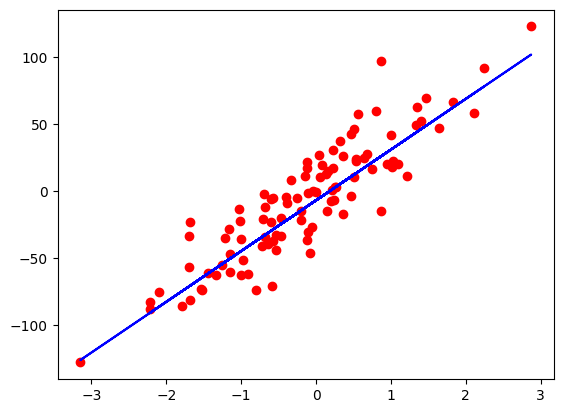

In [11]:
with torch.no_grad():
    predicted = forward(w, X)

plt.plot(X_numpy,Y_numpy,"ro")
plt.plot(X_numpy,predicted,"b")
plt.show()


### 课堂练习5

使用pytorch的损失函数和优化器

In [12]:
w = torch.randn(1,requires_grad=True)
b = torch.randn(1,requires_grad=True)
print(w,b)


# 1.正向传播函数（模型计算图，此时数据和方法是分离的）
def forward(w, X):  # 构建计算图
    # global w, b
    return X*w + b

# 2.定义损失函数和优化器
lr = 0.00001
lossFunction = torch.nn.MSELoss()# 确定损失函数对象
optimizer = torch.optim.SGD([w,b],lr=lr)
print(optimizer)



tensor([0.3042], requires_grad=True) tensor([-0.7058], requires_grad=True)
SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 1e-05
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [13]:
# 3. 模型训练过程
epochs = 200000  #3000000  #100000  #
for epoch in range(epochs):     # epochs为训练的次数
    # 1.正向传播
    pred = forward(w, X)
    # 2.计算损失
    loss = lossFunction(pred, Y)
    # 3.向后传播
    loss.backward()
    # 4.更新参数
    # w.data = w.data - lr * w.grad
    # b.data = b.data - lr * b.grad
    optimizer.step()
    # 5.清空梯度
    # w.grad.zero_()
    optimizer.zero_grad()

    if epoch % 10000 == 0:
        print(f"loss={loss.item()},w={w.item()}")

loss=2033.5291748046875,w=0.30503925681114197
loss=1437.0567626953125,w=7.939890384674072
loss=1060.27978515625,w=14.027018547058105
loss=821.6541137695312,w=18.883787155151367
loss=670.0978393554688,w=22.761911392211914
loss=573.5550537109375,w=25.860973358154297
loss=511.8603210449219,w=28.33954429626465
loss=472.3040771484375,w=30.323495864868164
loss=446.8524169921875,w=31.912992477416992
loss=430.4224853515625,w=33.1871337890625
loss=419.7735290527344,w=34.20967102050781
loss=412.8428039550781,w=35.031341552734375
loss=408.31280517578125,w=35.69270324707031
loss=405.3475646972656,w=36.22416687011719
loss=403.4031982421875,w=36.650421142578125
loss=402.11358642578125,w=36.99531936645508
loss=401.2518310546875,w=37.27617263793945
loss=400.6873779296875,w=37.49909210205078
loss=400.3076477050781,w=37.68049240112305
loss=400.0483093261719,w=37.830745697021484


In [19]:
import torch 
import numpy as np
from sklearn import datasets

X_numpy,Y_numpy = datasets.make_regression(
        n_samples=100,
        n_features=1,
        noise=20,
        random_state=12
)

# 将numpy 的数据类型转成tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))
print(X.shape,Y.shape)

# 对Y进行格式统一
Y = Y.view(100,1)
print(X.shape, Y.shape)

n_samples, in_features = X.shape   #行、列分别作为样本个数，特征个数
n_lables, out_features = Y.shape   #行、列为标记个数，1或多个值（类别）

print(n_samples, in_features )
print(n_lables, out_features )


torch.Size([100, 1]) torch.Size([100])
torch.Size([100, 1]) torch.Size([100, 1])
100 1
100 1


In [20]:
# def model(x):
#     return m * x + b
model = torch.nn.Linear(in_features,out_features)	#构造函数的参数
print(model)


Linear(in_features=1, out_features=1, bias=True)
